In [4]:
import colormath

In [7]:
from colormath import color_objects, color_conversions, color_diff

black = color_objects.sRGBColor(0, 0, 0, is_upscaled=True)
white = color_objects.sRGBColor(255, 255, 255, is_upscaled=True)

black_lab = color_conversions.convert_color(black, colormath.color_objects.LabColor)
white_lab = color_conversions.convert_color(white, colormath.color_objects.LabColor)

delta = color_diff.delta_e_cie2000(black_lab, white_lab)
print(delta)

99.99998490203575


In [22]:
def calc_de00(c1, c2):
    c1 = color_objects.sRGBColor(*c1, is_upscaled=True)
    c2 = color_objects.sRGBColor(*c2, is_upscaled=True)

    c1_lab = color_conversions.convert_color(c1, colormath.color_objects.LabColor)
    c2_lab = color_conversions.convert_color(c2, colormath.color_objects.LabColor)

    delta = color_diff.delta_e_cie2000(c1_lab, c2_lab)
    return delta
    
print(calc_de00((0, 0, 0), (255, 255, 255)))

99.99998490203575


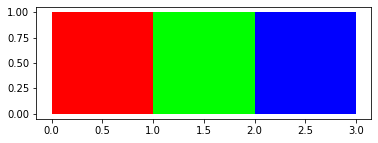

In [23]:
import matplotlib.pyplot as plt
plt.axes()
plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, fc=(1, 0, 0)))
plt.gca().add_patch(plt.Rectangle((1, 0), 1, 1, fc=(0, 1, 0)))
plt.gca().add_patch(plt.Rectangle((2, 0), 1, 1, fc=(0, 0, 1)))
plt.axis('scaled')
plt.show()

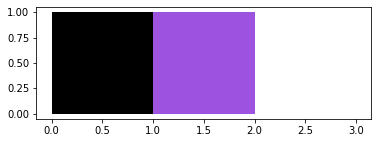

In [24]:
def show_color(color):
    plt.axes()
    plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, fc=(0, 0, 0)))
    plt.gca().add_patch(plt.Rectangle((1, 0), 1, 1, fc=(color[0] / 255, color[1] / 255, color[2] / 255)))
    plt.gca().add_patch(plt.Rectangle((2, 0), 1, 1, fc=(1, 1, 1)))
    plt.axis('scaled')
    plt.show()
    
show_color((158, 82, 224))

In [29]:
max_de00 = 0
opt_color = (0, 0, 0)

for r in range(256):
    for g in range(256):
        for b in range(256):
            de00 = min(calc_de00((r, g, b), (0, 0, 0)), calc_de00((r, g, b), (255, 255, 255)))
            if de00 > max_de00:
                max_de00 = de00
                opt_color = (r, g, b)
                print(de00, opt_color, end="                         \r")

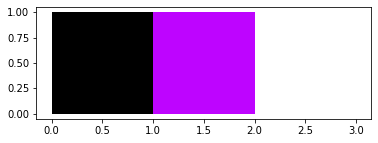

In [ ]:
show_color(opt_color)